In [1]:
%matplotlib widget

In [2]:
from bmcs_shear.dic_crack import DICGrid, DICAlignedGrid, DICCOR, DICInspector, DICCrack

# $\varphi$ Evaluation

<img src="phi eval.png" width="700"/> 

The distance formulas for calculating $d_{0t}$ and $d_[0c]$ are as follows:
\begin{equation}
    d_{0t} = \sqrt{(x_t - x_0)^2 + (y_t - y_0)^2}
\end{equation}

\begin{equation}
    d_{0c} = \sqrt{(x_{\mathrm{COR}} - x_0)^2 + (y_{\mathrm{COR}} - y_0)^2}
\end{equation}
After calculating the distances, the angle of rotation $\varphi$ can be calculated as:
\begin{equation}
    \varphi = \arctan \left(\frac{d_{0t}}{d_{0c}} \right)
\end{equation}

In [3]:
dic_grid = DICGrid(n_x=58, n_y=15, d_x=22, d_y=22, 
                   start_t=0, end_t=-1, U_factor=1, dir_name='B6_TV1')
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                  y_ref_i=-17, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min=29, n_x_max=38, n_x_step=1, n_y_min=4, n_y_step=1)

In [4]:
import numpy as np
end_t_arr = np.arange(1,31,1)
phi_arr = []
for end_t in end_t_arr[::1]:
    print('evaluating step', end_t)

    dic_grid.end_t = end_t

    # selected points for rotation
    XU_ija = dic_cor.dic_aligned_grid.x_ref_ija_scaled # check the refence system and verify
    XU_ija_sel = (XU_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                         dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
    XU_pr = XU_ija_sel.reshape(-1, 2)

    dic_cor.dic_grid.X_ija
    # selection of grid of points
    X_ija_sel = dic_cor.dic_grid.X_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                                       dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step]
    X_pr = X_ija_sel.reshape(-1, 2)

    # evaluating distances using distance formula
    X_cor_r = dic_cor.X_cor
    XU_mid_pr = (XU_pr + X_pr) / 2

    V_X_XU_mid_pr = X_cor_r[np.newaxis, :] - XU_mid_pr
    V_XU_XU_mid_pr = XU_pr - XU_mid_pr

    len_d_0c = np.sqrt(np.einsum('...i,...i->...', V_X_XU_mid_pr, V_X_XU_mid_pr ))
    len_d_0t = np.sqrt(np.einsum('...i,...i->...', V_XU_XU_mid_pr, V_XU_XU_mid_pr ))

    phi = 2*np.arctan(len_d_0t/len_d_0c)
    phi_avg = np.average(phi)
    phi_arr.append(phi_avg)

    print('phi_avg', phi_avg)

evaluating step 1
phi_avg 0.00502384481252922
evaluating step 2
phi_avg 0.007425975370428152
evaluating step 3
phi_avg 0.011759988749011362
evaluating step 4
phi_avg 0.014398962747931236
evaluating step 5
phi_avg 0.014814228120429162
evaluating step 6
phi_avg 0.015212780873063152
evaluating step 7
phi_avg 0.01781225729931489
evaluating step 8
phi_avg 0.0169553219216478
evaluating step 9
phi_avg 0.019281484855807444
evaluating step 10
phi_avg 0.015701630612261826
evaluating step 11
phi_avg 0.01797354752557545
evaluating step 12
phi_avg 0.017596117915219502
evaluating step 13
phi_avg 0.01744898801396457
evaluating step 14
phi_avg 0.01785334090985618
evaluating step 15
phi_avg 0.02111893436830367
evaluating step 16
phi_avg 0.020003181815066124
evaluating step 17
phi_avg 0.02022190164579802
evaluating step 18
phi_avg 0.04284208328630005
evaluating step 19
phi_avg 0.019756363947199644
evaluating step 20
phi_avg 0.018485886409616275
evaluating step 21
phi_avg 0.015339406442754486
evaluating 

In [5]:
from os.path import expanduser, join
import os

In [6]:
home_dir = expanduser('~')
data_dir = join(home_dir,'simdb','data','load','B6_V1')
data_dir

'C:\\Users\\fahad\\simdb\\data\\load\\B6_V1'

In [7]:
results = [join(data_dir,each) 
           for each in sorted(os.listdir(data_dir)) 
           if each.endswith('.csv')]
results

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\fahad\\simdb\\data\\load\\B6_V1'

In [ ]:
load = np.loadtxt(results[0], dtype=float, 
            skiprows=1, delimiter=',', usecols=(0), unpack=False)
load

(Text(0.5, 0, '$\\varphi$'), Text(0, 0.5, 'Load'))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
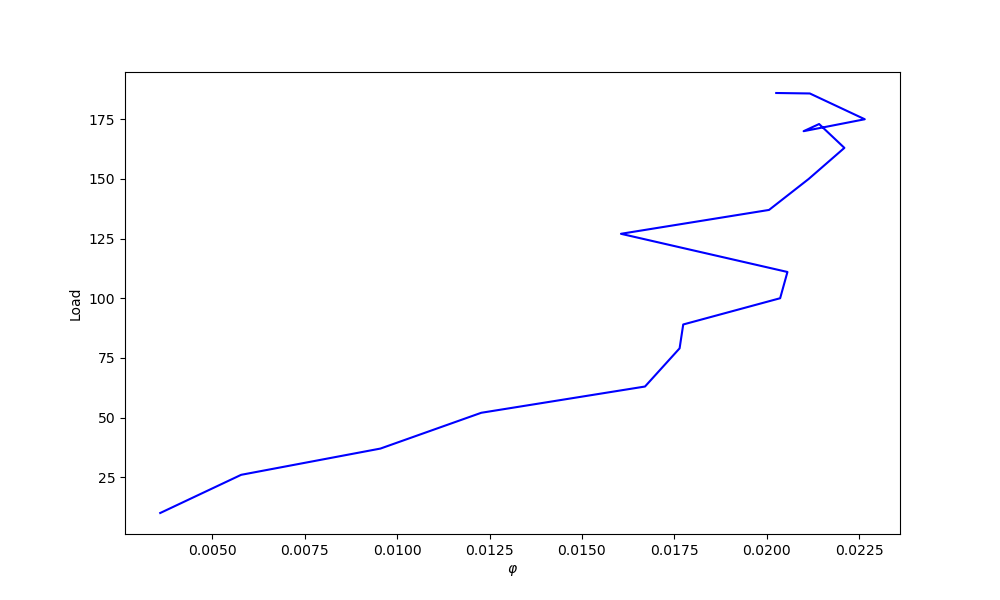

In [21]:
import matplotlib.pyplot as plt
_, ax1 = plt.subplots(1, 1, figsize=(10,6))

ax1.plot(phi_arr[:-12], load[:-13], color = 'blue')
ax1.set_xlabel(r'$\varphi$'), ax1.set_ylabel('Load')

In [3]:
# import numpy as np
# end_t_arr = np.arange(1,31,1)
# phi_arr = []
# for end_t in end_t_arr:
#     print('evaluating step', end_t)
#     # dic_grd, dic_aligned_grid, dic_cor
#     dic_grid = DICGrid(n_x=58, n_y=15, d_x=22, d_y=22, 
#                      start_t=0, end_t=end_t, U_factor=1, dir_name='B6_TV1')
#     dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
#                                  y_ref_i=-17, y_ref_j_min=1, y_ref_j_max=10)
#     dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
#                  n_x_min = 29, n_x_max = 38, n_x_step=1, n_y_min = 4, n_y_step = 1)

#     # evaluating deltas
#     delta_u_ul_ija = dic_cor.dic_aligned_grid.delta_u_ul_ija
#     delta_u0_ul_ija = dic_cor.dic_aligned_grid.delta_u0_ul_ija
    
#     # selected points for rotation
#     rot_Xu_ija = dic_cor.dic_aligned_grid.rot_Xu_ija
#     rot_Xu_ija_sel = (dic_cor.dic_aligned_grid.rot_Xu_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
#                                    dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
#     rot_X_pa_sel = rot_Xu_ija_sel.reshape(-1, 2)

#     # selection of grid of points
#     X_ija_sel = dic_cor.dic_grid.X_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
#                     dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step]
#     X_pa_sel = X_ija_sel.reshape(-1, 2)

#     # evaluating distances using distance formula

#     d_0c = np.sqrt((dic_cor.x_cor_pa_sol[:, 0] - X_pa_sel[:, 0]) ** 2
#                                      + (dic_cor.x_cor_pa_sol[:, 1] - X_pa_sel[:, 1]) ** 2)

#     d_0t = np.sqrt((rot_X_pa_sel[:, 0] - X_pa_sel[:, 0]) ** 2
#                                      + (rot_X_pa_sel[:, 1] - X_pa_sel[:, 1]) ** 2)
    
#     phi = np.arctan(d_0t/d_0c)
    
#     phi_avg = np.average(phi)
    
#     phi_arr.append(phi_avg)
    
#     print('phi_avg', phi_avg)

evaluating step 1
phi_avg 0.0122229106702519
evaluating step 2
phi_avg 0.016094583751408282
evaluating step 3
phi_avg 0.05513367611516827
evaluating step 4
phi_avg 0.05579961153844669
evaluating step 5
phi_avg 0.11996935016400637
evaluating step 6
phi_avg 0.12040228000507716
evaluating step 7
phi_avg 0.12608153662523652
evaluating step 8
phi_avg 0.13164695674670884
evaluating step 9
phi_avg 0.08218906525226433
evaluating step 10
phi_avg 0.11996935016400637
evaluating step 11
phi_avg 0.10326890910485441
evaluating step 12
phi_avg 0.12040228000507716
evaluating step 13
phi_avg 0.12722081595633547
evaluating step 14
phi_avg 0.12365483492551235
evaluating step 15
phi_avg 0.11730561444407521
evaluating step 16
phi_avg 0.12485706242450283
evaluating step 17
phi_avg 0.14172350144068913
evaluating step 18
phi_avg 0.1383843937048634
evaluating step 19


<ipython-input-3-9ce84de8ac07>:37: RuntimeWarning: invalid value encountered in true_divide
  phi = np.arctan(d_0t/d_0c)


phi_avg nan
evaluating step 20
phi_avg 0.1385144137364011
evaluating step 21
phi_avg 0.1228824851998865
evaluating step 22
phi_avg 0.1240260113771447
evaluating step 23
phi_avg 0.1236940637529132
evaluating step 24
phi_avg 0.136541904960108
evaluating step 25
phi_avg 0.1274495500867469
evaluating step 26
phi_avg 0.14469229331382738
evaluating step 27
phi_avg 0.14079073446911697
evaluating step 28
phi_avg 0.1333560491964985
evaluating step 29
phi_avg 0.12598062787454214
evaluating step 30
phi_avg 0.0016357673424745956


In [4]:
load = np.loadtxt(r"D:\Shear zones\load text files\Load_b6_tv1.txt", unpack=True)
#np.shape(load)
#load

OSError: D:\Shear zones\load text files\Load_b6_tv1.txt not found.

In [ ]:
import matplotlib.pyplot as plt
_, ax1 = plt.subplots(1, 1, figsize=(10,6))

ax1.plot(phi_arr[0:18], load[1:19], color = 'blue')
ax1.set_xlabel(r'$\varphi$'), ax1.set_ylabel('Load')
#plt.savefig("D:\\Shear zones\drawings\Load_rotation.pdf")

In [ ]:
#     d_tc = np.sqrt((dic_cor.x_cor_pa_sol[:, 0] - rot_X_pa_sel[:, 0]) ** 2
#                                    + (dic_cor.x_cor_pa_sol[:, 1] - rot_X_pa_sel[:, 1]) ** 2)

    
#     # averaging all distances
#     d_tc_avg = np.average(d_tc)
#     d_0c_avg = np.average(d_0c)
#     d_0t_avg = np.average(d_0t)


    
#     # calculating phi using law of cosine
#     phi = np.arccos(
#             (d_tc_avg ** 2 + d_0c_avg ** 2 - d_0t_avg ** 2)
#             / (2 * d_tc_avg * d_0c_avg))
#     phi_val.append(phi)
    #print(phi_val)
    